# Suicide Rates Overview 1985 to 2016
##### https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Aluno: Guilherme Pereira <br>
Matrícula: 2016023354

## Introdução

Neste trabalho analisaremos os dados do banco de dados citado no título para buscar entendê-los de forma mais ampla.

## Motivação

A motivação para esse trabalho foi procurar entender melhor o tema de suicídios, que infelizmente ainda ocorrem em números alarmantes. Dentro da própria UFMG ocorrem alguns casos, então percebe-se a gravidade e amplitude deste triste ato.

## Análise Inicial:

O objetivo inicial desse trabalho é entender de certa maneira como os dados estão organizados. <br> <br>
A primeira célula, como se pode ver, é apenas responsável por importas as bibliotecas e funções que serão utilizadas.

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Para se ter uma ideia inicial dos dados, será feita uma análise simples da tabela utilizada, primeiro vendo o formato dela, com algumas linhas e depois vendo informações gerais.

In [2]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Como pode se ver, a tabela tem um total de 27820 linhas. A coluna mais importante, suicides_no, que representa o número de suicídios, tem média de 242, por exemplo. <br>

Mas o que esse número 242 representa? Ele mostra que nessa tabela cada linha tem em média um número de suicídios igual a 242. Mas isso não é muito significativo, pois em cada linha, a coluna suicides_no representa o número de suicídios em um país, em um ano, considernado uma faixa etária específica. <br>

Por isso, nas células abaixo, foi feito um groupby por ano, ou seja, organizar os dados por apenas uma métrica. Com isso, foi usada a função sum, para somar os dados daquele ano.

In [4]:
gb = df.groupby(['year']).sum()

years = np.array(gb.index)
suicides = gb['suicides_no']

Assim, agora é possível vizualizar o número de suicídios total por ano, considerando os dados da tabela:

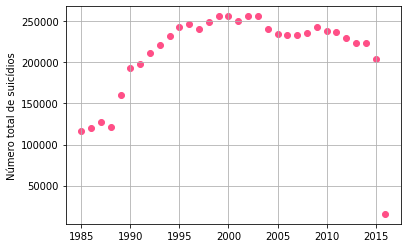

In [5]:
plt.scatter(years, suicides, color='#ff4f87')
plt.ylabel('Número total de suicídios')
plt.grid(True)

plt.show()

Uma das perguntas a serem feitas, é se os suicídios possuem alguma relação com o sexo da pessoa. <br>

Assim, faremos um teste de hipótese. <br>

Hipótese nula: Sexo não afeta o número de suicídios<br>
Hipótese alternativa: Sexo afeta o número de suicídios<br>

Para isso, será feito um bootstrap para analisar o intervalo de confiança da proporção de homens nos dados, como pode ser visto na função abaixo.

In [6]:
def bootstrap_prop(df, n, size):
    values = np.zeros(n)
    
    for i in range (n):
        sample = df.sample(size, replace=True)
        gb = sample.groupby(['sex']).sum()
        
        total = gb['suicides_no'].sum()
        values[i] = gb['suicides_no'][1] * 100 / total
        
    return values

Essa função seguinte foi criada para obter os intervalos de confiança

In [7]:
def percentile(b_values, init, final):
    superior = np.percentile(b_values, final)
    inferior = np.percentile(b_values, init)
    
    return (inferior, superior)

Essa célula é responsável por calcular o bootstrap e plotar o gráfico:

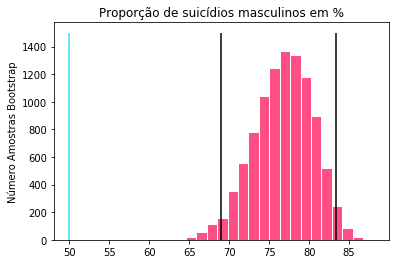

In [8]:
bootstrap_sex = bootstrap_prop(df,10000,1000)

lim_inf, lim_sup = percentile(bootstrap_sex, 2.5, 97.5)

plt.hist(bootstrap_sex, edgecolor='w', label='Possui a Lei', bins=20, color='#ff4f87')

plt.title('Proporção de suicídios masculinos em %')
plt.ylabel('Número Amostras Bootstrap')

plt.vlines(lim_inf, 0, 1500)
plt.vlines(lim_sup, 0, 1500)
plt.vlines(50, 0, 1500, color='#32e3f0')

plt.show()

Como pode ser visto, vamos rejeitar a hipótese nula. As linhas verticais pretas representam o intervalo de confiança de 95% e a linha em ciano representa a proporção média esperada de 50%.

Assim, com 95% de confiança, considerando essa base de dados, podemos dizer que em média o sexo influencia na probabilidade de suicídio, sendo alguém do sexo masculino a pessoa com mais chances de cometer o ato.

Agora, será feita uma análise de regressão linear para representar os números totais de suicídios femininos ao longo dos anos. <br>

Primeiro será preciso criar um novo dataframe que apresente apenas as células em que o sexo é o feninino e depois fazer um groupby por ano.

In [9]:
df2 = df.copy()
df2 = df2[df2['sex'] == 'female']

gb2 = df2.groupby(['year']).sum()

Uso do reshape para o X ficar no formato aceito pelo LinearRegression() do sklearn:

In [10]:
X = np.array(gb.index).reshape(-1, 1)
y = np.array(gb2['suicides_no']).reshape(-1,1)

Aqui está o modelo em si:

In [11]:
model = LinearRegression()
model.fit(X, y)
yPred = model.predict(X)

Aqui está a célula responsável por plotar o gráfico da regressão linear. <br>

Como se pode ver, depois dos anos 1990 o gráfico fica bem linear, o que faz a regressão linear não ser um modelo tão ruim. Contudo, percebe-se que no ano de 2016 e nos anos anteriores a 1990 o erro é elevado.

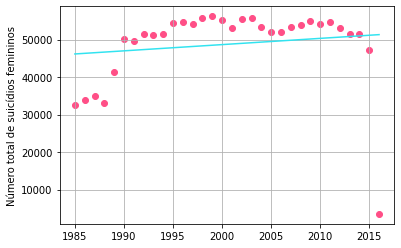

In [12]:
plt.scatter(X, y,  color='#ff4f87')  
plt.plot(X, yPred, color='#32e3f0', linewidth=1.5)
plt.grid(True)
   
plt.ylabel('Número total de suicídios femininos')   
plt.show()

Agora, será feito um groupby com base no GDP per capta, o PIB per capta em português. O Objetivo é descobrir um intervalo de confiança para os valores médios dessa coluna

In [13]:
gb3 = df.groupby(['gdp_per_capita ($)']).sum()
gb3.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year
count,2233.000000,2233.000000,2.233000e+03,2233.000000,2233.000000
mean,24932.829378,3022.131661,2.298350e+07,159.670322,2.908863
std,4830.944969,7241.579606,4.266616e+07,123.159254,4.399792
min,20160.000000,0.000000,2.519200e+04,0.000000,0.000000
25%,23940.000000,130.000000,2.137831e+06,67.940000,0.000000
50%,24024.000000,598.000000,6.109931e+06,136.430000,0.000000
75%,24108.000000,2374.000000,2.145800e+07,220.550000,8.280000
max,72036.000000,61420.000000,3.000785e+08,855.300000,17.964000


Aqui, será calculado a GDP per capta médio da tabela como um todo. Será uma média ponderada, tendo em vista que cada número de GDP per capta possui um número de suicídios diferente

In [14]:
(np.array(gb3.index) * np.array(gb3['suicides_no'])).sum()/ np.array(gb3['suicides_no']).sum()

21173.87668002288

Essa célula é a responśavel por calcular o bootstrap, que é a mesma operação feita acima, só que com amostras sem reposição

In [15]:
def bootstrap_GDP(df, n, size):
    values = np.zeros(n)
    
    for i in range (n):
        sample = df.sample(size, replace=True)
        gb = sample.groupby(['gdp_per_capita ($)']).sum()
        nSuicidios = np.array(gb['suicides_no'])
        values[i] = (np.array(gb.index) * nSuicidios).sum()/ nSuicidios.sum()
        
    return values

Além de chamar a função do bootstrap, esta célula calcula os intervalos de confiança com a função percentile previamente criada

In [16]:
bootstrap_GDP_capta = bootstrap_GDP(df,1000,500)

lim_inf, lim_sup = percentile(bootstrap_GDP_capta, 2.5, 97.5)

print('Limite inferior: ' + str(lim_inf))
print('Limite superior: ' + str(lim_sup))

Limite inferior: 14881.406151978748
Limite superior: 27638.54577928743


Por fim, esta é a célula responsável por imprimir o gráfico <br>

Como se pode ver nos prints acima e no gráfico abaixo, com 95% de confiança, o valor do GDP per capta médio das pessoas que cometeram suicídio neste banco da dados está aproximadamente entre 15000 e 27000 dólares por ano por pessoa. <br>

No gráfico, as linhas pretas representam o intervalo de confiança e a linha ciano representa a média real dos dados calculada.

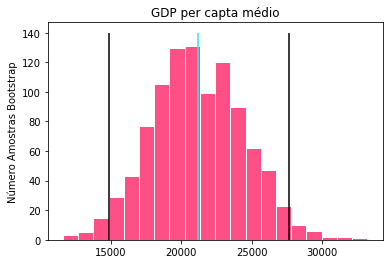

In [17]:
plt.hist(bootstrap_GDP_capta, edgecolor='w', label='Possui a Lei', bins=20, color='#ff4f87')

plt.title('GDP per capta médio')
plt.ylabel('Número Amostras Bootstrap')

plt.vlines(lim_inf, 0, 140)
plt.vlines(lim_sup, 0, 140)
plt.vlines(21173.87668002288, 0, 140, color='#32e3f0')

plt.show()

Agora o objetivo é fazer uma análise KNN dos dados da tabela. Para isso, primeiramente serão removidas todas as colunas que possuem valores não numéricos ou que são redundantes.

In [18]:
df3 = df.copy()
del df3['sex']
del df3['suicides/100k pop']
del df3['country-year']
del df3['HDI for year']
del df3[' gdp_for_year ($) ']
del df3['generation']
del df3['age']
del df3['country']

Nas próximas células, uma descrição simples dos novos dados. É possível perceber que o número de linhas é o mesmo da tabela original

In [19]:
df3.describe()

,year,suicides_no,population,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,16866.464414
std,8.469055,902.047917,3.911779e+06,18887.576472
min,1985.000000,0.000000,2.780000e+02,251.000000
25%,1995.000000,3.000000,9.749850e+04,3447.000000
50%,2002.000000,25.000000,4.301500e+05,9372.000000
75%,2008.000000,131.000000,1.486143e+06,24874.000000
max,2016.000000,22338.000000,4.380521e+07,126352.000000


In [20]:
df3.head()

,year,suicides_no,population,gdp_per_capita ($)
0,1987,21,312900,796
1,1987,16,308000,796
2,1987,14,289700,796
3,1987,1,21800,796
4,1987,9,274300,796


Agora, as variáveis X2 e y2 vão armazenas os dados das colunas. A variável y2 representará o número de suicídios e a variável X2 representará as outras colunas.

In [21]:
copy = df3.copy()

y2 = copy['suicides_no']
del copy['suicides_no']
X2 = copy

Para fazer a divisão entre teste e treino, foi utiliada a função train_test_split(). Nela, o test_size foi de 0.2, ou seja, 20% do tamanho total dos dados

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

Em seguida, os dados serão normalizados. Importante frisar que para normalizar o teste deve-se usar os dados do treino, e isso é o que é feito a seguir:

In [23]:
scaler = StandardScaler()

X_nTest = (X_test - X_train.mean()) / X_train.std(ddof=1)
X_nTrain = scaler.fit_transform(X_train)

Agora será analisada quantos vizinhos devem ser utilizados no KNN. Para isso, foi usada a função importada GridSearchCV. Ela iŕa dividir os dados em 5 (cv=5) partes para fazer o processo de train e test. Esse processo será feito com 2 a 15 vizinhos. O número de vizinhos ótimo será printado.

In [24]:
knn = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(2, 15)}

knn = GridSearchCV(knn, param_grid, cv=5)

knn.fit(X_nTrain, y_train)

print(knn.best_params_)

/home/gprimate/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 14}


/home/gprimate/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Por fim, seŕa feito o classification report, comparando os valores reais de teste com os valores previstos pelo modelo

In [25]:
model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_nTrain, y_train)

print(classification_report(y_test, model_knn.predict(X_nTest)))

              precision    recall  f1-score   support

           0       0.35      0.84      0.49       856
           1       0.04      0.09      0.06       295
           2       0.04      0.07      0.05       211
           3       0.04      0.07      0.05       166
           4       0.03      0.06      0.04       136
           5       0.01      0.01      0.01       107
           6       0.04      0.05      0.05        97
           7       0.02      0.02      0.02       103
           8       0.04      0.04      0.04        82
           9       0.02      0.01      0.02        77
          10       0.00      0.00      0.00        53
          11       0.00      0.00      0.00        60
          12       0.02      0.02      0.02        49
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        46
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        50
          17       0.00    

/home/gprimate/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gprimate/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
